# Manager report

In [30]:
import duckdb

duckdb_path = "data/sakila.duckdb"

dfs = {}

with duckdb.connect(duckdb_path) as conn:
    description = conn.sql("DESC;").df()

    for name in description["name"]:
        if name[0] != '_':
            dfs[name] = conn.sql(f"FROM staging.{name};").df()
            duckdb.register(name, dfs[name])
    
duckdb.sql("DESC;").df()

,database,schema,name,column_names,column_types,temporary
0,temp,main,actor,"[actor_id, first_name, last_name, last_update, _dlt_load_id, _dlt_id]","[DOUBLE, VARCHAR, VARCHAR, TIMESTAMP, VARCHAR, VARCHAR]",True
1,temp,main,address,"[address_id, address, address2, district, city_id, postal_code, phone, last_update, _dlt_load_id, _dlt_id]","[BIGINT, VARCHAR, ""NULL"", VARCHAR, BIGINT, VARCHAR, VARCHAR, TIMESTAMP, VARCHAR, VARCHAR]",True
2,temp,main,category,"[category_id, name, last_update, _dlt_load_id, _dlt_id]","[BIGINT, VARCHAR, TIMESTAMP, VARCHAR, VARCHAR]",True
3,temp,main,city,"[city_id, city, country_id, last_update, _dlt_load_id, _dlt_id]","[BIGINT, VARCHAR, BIGINT, TIMESTAMP, VARCHAR, VARCHAR]",True
4,temp,main,country,"[country_id, country, last_update, _dlt_load_id, _dlt_id]","[BIGINT, VARCHAR, TIMESTAMP, VARCHAR, VARCHAR]",True
5,temp,main,customer,"[customer_id, store_id, first_name, last_name, email, address_id, active, create_date, last_update, _dlt_load_id, _dlt_id]","[BIGINT, BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, VARCHAR, TIMESTAMP, TIMESTAMP, VARCHAR, VARCHAR]",True
6,temp,main,film,"[film_id, title, description, release_year, language_id, original_language_id, rental_duration, rental_rate, length, replacement_cost, rating, special_features, last_update, _dlt_load_id, _dlt_id]","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, BIGINT, BIGINT, DOUBLE, BIGINT, DOUBLE, VARCHAR, VARCHAR, TIMESTAMP, VARCHAR, VARCHAR]",True
7,temp,main,film_actor,"[actor_id, film_id, last_update, _dlt_load_id, _dlt_id]","[BIGINT, BIGINT, TIMESTAMP, VARCHAR, VARCHAR]",True
8,temp,main,film_category,"[film_id, category_id, last_update, _dlt_load_id, _dlt_id]","[BIGINT, BIGINT, TIMESTAMP, VARCHAR, VARCHAR]",True
9,temp,main,inventory,"[inventory_id, film_id, store_id, last_update, _dlt_load_id, _dlt_id]","[BIGINT, BIGINT, BIGINT, TIMESTAMP, VARCHAR, VARCHAR]",True


1. a) Which movies are longer than 3 hours (180 minutes), show the title and its length?

In [31]:
film_len180 = duckdb.sql("""
    SELECT
        title,
        length
    FROM
        film
    WHERE
        length > 180;
""").df()


film_len180.index = film_len180.index + 1
film_len180

,title,length
1,ANALYZE HOOSIERS,181
2,BAKED CLEOPATRA,182
3,CATCH AMISTAD,183
4,CHICAGO NORTH,185
5,CONSPIRACY SPIRIT,184
6,CONTROL ANTHEM,185
7,CRYSTAL BREAKING,184
8,DARN FORRESTER,185
9,FRONTIER CABIN,183
10,GANGS PRIDE,185


1. b) Which movies have the word "love" in its title? Show the following columns
- Note: Only movies that have the word "love" is on the list. This means that movies with "lovely" will not be a part of the list.

In [32]:
import pandas as pd

pd.set_option("display.max_colwidth", None)

film_love = duckdb.sql("""
    SELECT
        title,
        rating,
        length,
        description
    FROM
        film
    WHERE
        title LIKE '% LOVE' OR
        title LIKE 'LOVE %' OR
        title LIKE '% LOVE %';
""").df()

film_love.index = film_love.index + 1
film_love

,title,rating,length,description
1,GRAFFITI LOVE,PG,117,A Unbelieveable Epistle of a Sumo Wrestler And a Hunter who must Build a Composer in Berlin
2,IDAHO LOVE,PG-13,172,A Fast-Paced Drama of a Student And a Crocodile who must Meet a Database Administrator in The Outback
3,INDIAN LOVE,NC-17,135,A Insightful Saga of a Mad Scientist And a Mad Scientist who must Kill a Astronaut in An Abandoned Fun House
4,LAWRENCE LOVE,NC-17,175,A Fanciful Yarn of a Database Administrator And a Mad Cow who must Pursue a Womanizer in Berlin
5,LOVE SUICIDES,R,181,A Brilliant Panorama of a Hunter And a Explorer who must Pursue a Dentist in An Abandoned Fun House


1. c) Calculate descriptive statistics on the length column

In [33]:
film_length = duckdb.sql("""
    SELECT
        MIN(length) AS Shortest_min,
        round(AVG(length),0)::INT AS Average_min,
        round(MEDIAN(length),0)::INT AS Median_min,
        MAX(length) AS Longest_min
    FROM
        film;
""").df()

film_length

,Shortest_min,Average_min,Median_min,Longest_min
0,46,115,114,185


1. d)  The 10 most expensive movies to rent per day

In [34]:

film_dayrent = duckdb.sql("""
    SELECT
        title,
        round((rental_rate / rental_duration),2) AS Rent_per_day
    FROM
        film
    ORDER BY
        Rent_per_day DESC,
        title ASC
    LIMIT
        10;
""").df()

film_dayrent.index = film_dayrent.index + 1
film_dayrent

,title,Rent_per_day
1,ACE GOLDFINGER,1.66
2,AMERICAN CIRCUS,1.66
3,AUTUMN CROW,1.66
4,BACKLASH UNDEFEATED,1.66
5,BEAST HUNCHBACK,1.66
6,BEHAVIOR RUNAWAY,1.66
7,BILKO ANONYMOUS,1.66
8,CARIBBEAN LIBERTY,1.66
9,CASPER DRAGONFLY,1.66
10,CASUALTIES ENCINO,1.66


1. e)  Which actors have played in most movies?

In [35]:
most_movies = duckdb.sql("""
    SELECT
        a.first_name || ' ' || a.last_name AS Actor,
        COUNT(*) AS Nr_movies
    FROM
        film_actor fa
    LEFT JOIN actor a ON a.actor_id = fa.actor_id
    GROUP BY
        Actor
    ORDER BY
        Nr_movies DESC
    LIMIT
        10;
""").df()

most_movies.index = most_movies.index + 1
most_movies

,Actor,Nr_movies
1,SUSAN DAVIS,54
2,GINA DEGENERES,42
3,WALTER TORN,41
4,MARY KEITEL,40
5,MATTHEW CARREY,39
6,SANDRA KILMER,37
7,SCARLETT DAMON,36
8,GROUCHO DUNST,35
9,VIVIEN BASINGER,35
10,UMA WOOD,35


1. f)  Write down 3-5 questions you want to answer and then answer them using pandas and duckdb.
    - To be able to buy some new movies and removing som old movies i want to know.
        1. Which category generates the most revenue relative to the number of films we have in that category? 
        2. Which actor is the most popular in each category?
        3. What are the bottom 10 films in terms of the least revenue generated?


2. a)  Who are our top 5 customers by total spend?

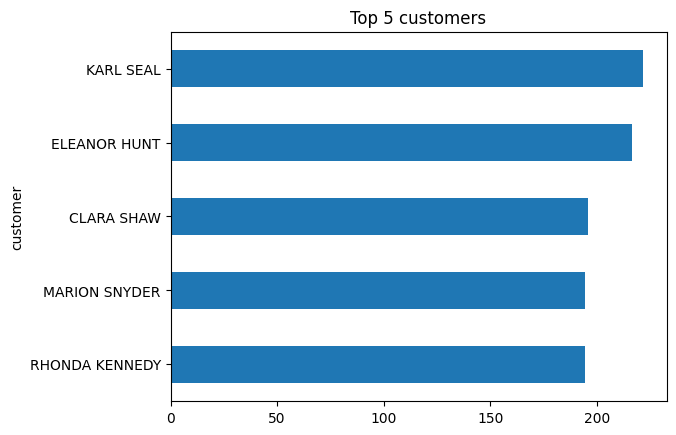

In [ ]:
top5_customers = duckdb.sql("""
    SELECT
        c.customer_id,
        c.first_name || ' ' || c.last_name AS customer,
        sum(p.amount) AS total_spend
    FROM
        payment p
        LEFT JOIN customer c ON c.customer_id = p.customer_id
    GROUP BY
        customer, c.customer_id
    ORDER BY
        total_spend DESC
    LIMIT
        5;

""").df()

ax = top5_customers.plot (kind = "barh", x = "customer", y = "total_spend", title="Top 5 customers", legend=False)
ax.invert_yaxis()

2. b)  How much money does each film category bring in? Make a bar chart showing total revenue per film
category.

,category,total_sum
0,Sports,5314.21
1,Sci-Fi,4756.98
2,Animation,4656.30
3,Drama,4587.39
4,Comedy,4383.58
5,Action,4375.85
6,New,4351.62
7,Games,4281.33
8,Foreign,4270.67
9,Family,4226.07


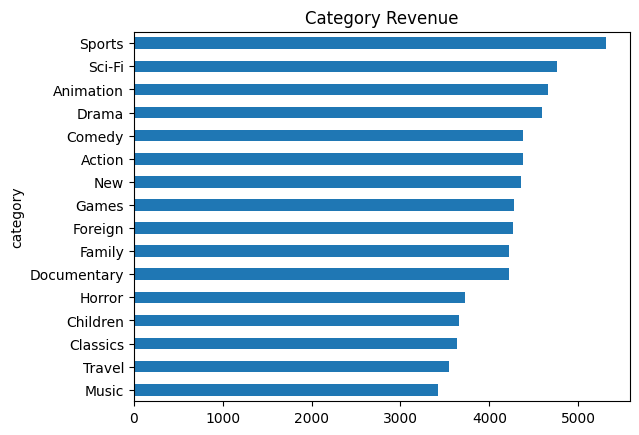

In [41]:
rev_category = duckdb.sql("""
    SELECT
        c.name AS category,
        SUM(p.amount) total_sum,
    FROM
        payment p
        LEFT JOIN rental r ON p.rental_id = r.rental_id
        INNER JOIN inventory i ON i.inventory_id = r.inventory_id
        INNER JOIN film f ON f.film_id = i.film_id
        INNER JOIN film_category fc ON fc.film_id = f.film_id
        INNER JOIN category c ON c.category_id = fc.category_id
    GROUP BY
        category
    ORDER BY
        total_sum DESC;

""").df()

ax = rev_category.plot (kind = "barh", x = "category", y = "total_sum", title="Category Revenue", legend= False)
ax.invert_yaxis()

rev_category